# Tune Up vs Creative, 2020-04-08

?? [Facebook RaceQs video]()

[RaceQs Link](https://raceqs.com/tv-beta/tv.htm#userId=1073253&updatedAt=2020-04-09T01:04:48Z&dt=2020-04-08T10:49:19-07:00..2020-04-08T15:07:03-07:00&boat=Peer%20Gynt)

### Crew 

Peer Gynt: Sara and Paul.  Creative: Al and Shauna

### Conditions

Sunny and warm.  Wind up to 15kts with seastate 2-4 feet.  

## Summary


### Learnings

### West Point Wind

![im](Data/Images/2020-04-08-WestPointWind.png)



In [2]:
# Load some libraries
%matplotlib notebook
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

import numpy as np

# These are libraries written for RaceAnalysis
import global_variables
G = global_variables.init_seattle()
import race_logs
import process as p
import analysis as a
import chart as c

In [3]:
import importlib
importlib.reload(race_logs)

<module 'race_logs' from '/Users/viola/GDriveBV/Sailboat/Code/Python/sailing/race_logs.py'>

In [4]:
dfs, races, big_df = race_logs.read_dates(["2020-04-08"])
# dfs, races, big_df = race_logs.read_dates(["2019-11-16"])
df = dfs[0]

Session from 2020-04-08 17:49:21.050000, 154618 rows, 4.294722222222222 hours.


In [5]:
races[0]

file              2020-04-08_10:49.pd.gz
race                                    
begin                              40409
end                               130577
datetime       2020-04-08 10:49:00-07:00
description                             
Name: 29, dtype: object

In [6]:
df

,turn_rate,zeus_cog,zeus_sog,rhdg,rsog,latitude,longitude,raws,rawa,row_seconds,...,boat_twd,twd,stwd,stws,stwa,spd,sog,hdg,cog,row_times
40414,4.922,320.400,2.670,317.900,2.630,47.691,-122.415,8.320,31.400,4041.400,...,11.900,5.057,12.173,6.352,-320.966,2.495,2.626,317.309,318.497,2020-04-08 11:56:41.956574584-07:00
40415,4.922,315.400,2.720,318.400,2.720,47.691,-122.415,8.320,33.500,4041.500,...,11.900,5.100,12.175,6.352,-321.465,2.496,2.645,317.527,317.937,2020-04-08 11:56:42.056497574-07:00
40416,4.389,315.400,2.720,318.900,2.720,47.691,-122.415,8.320,31.200,4041.600,...,11.800,5.131,12.175,6.352,-321.965,2.497,2.660,317.802,317.434,2020-04-08 11:56:42.156528265-07:00
40417,3.142,315.400,2.720,319.400,2.700,47.691,-122.415,8.320,31.200,4041.700,...,11.800,5.162,12.174,6.352,-322.465,2.498,2.668,318.121,316.930,2020-04-08 11:56:42.256558956-07:00
40418,1.423,320.800,2.620,319.800,2.700,47.691,-122.415,8.320,31.200,4041.800,...,11.800,5.194,12.174,6.352,-322.865,2.510,2.674,318.457,316.547,2020-04-08 11:56:42.356589647-07:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130577,-2.236,138.800,2.410,98.400,2.610,47.682,-122.413,5.350,-83.900,13057.700,...,5.000,2.135,-0.750,6.394,-114.389,2.228,2.606,99.867,138.806,2020-04-08 14:26:58.071972209-07:00
130578,-2.236,138.800,2.410,98.300,2.600,47.682,-122.413,5.350,-87.800,13057.800,...,5.000,2.123,-0.752,6.392,-114.292,2.228,2.605,99.554,138.216,2020-04-08 14:26:58.171948154-07:00
130579,-1.758,127.300,2.520,98.000,2.590,47.682,-122.413,5.350,-91.300,13057.900,...,5.000,2.098,-0.768,6.391,-114.008,2.241,2.602,99.243,137.614,2020-04-08 14:26:58.271924098-07:00
130580,-1.758,127.300,2.520,97.800,2.580,47.682,-122.413,5.350,-90.900,13058.000,...,5.000,2.073,-0.785,6.389,-113.824,2.251,2.597,98.955,137.033,2020-04-08 14:26:58.371900043-07:00


<IPython.core.display.Javascript object>


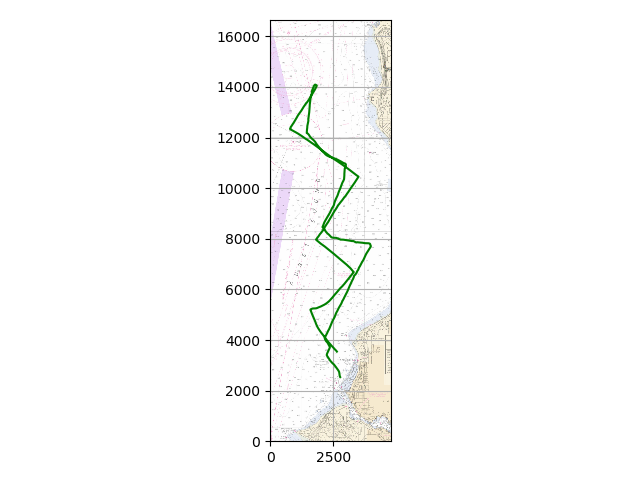

In [7]:
ch = c.plot_chart(df)
c.draw_track(df, ch)

<IPython.core.display.Javascript object>


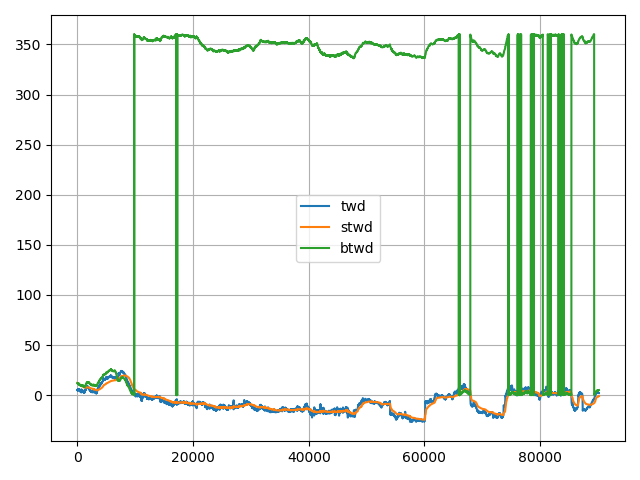

In [9]:
c.quick_plot(None, (df.twd, df.stwd, df.boat_twd), "twd stwd btwd".split())

<IPython.core.display.Javascript object>


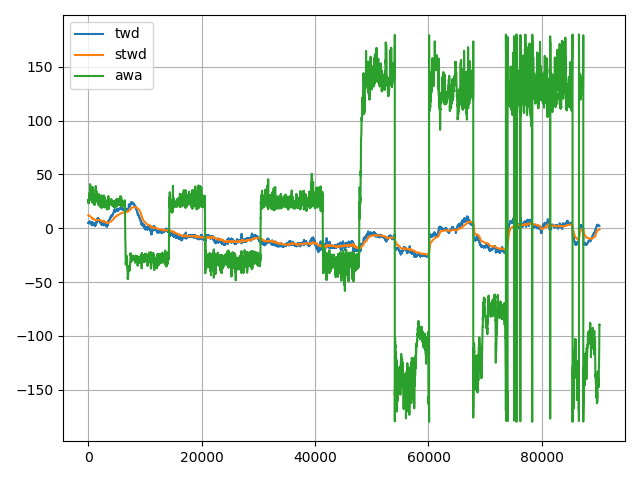

In [10]:
c.quick_plot(None, (df.twd, df.stwd, df.awa), "twd stwd awa".split())

<IPython.core.display.Javascript object>


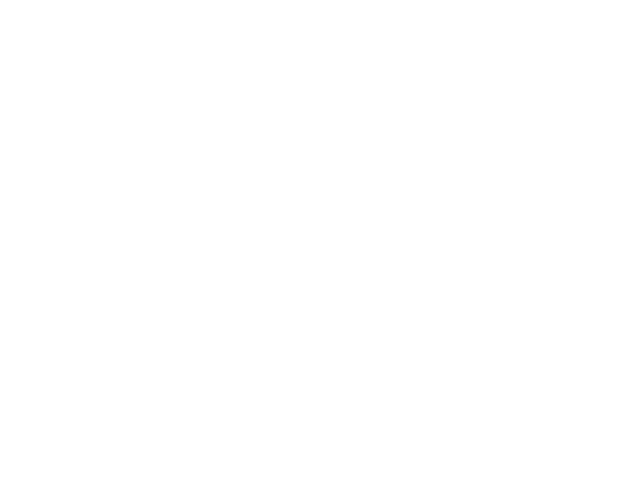

In [31]:
# ss = slice(ch.begin, ch.end)
wdf = df.loc[ss]
c.quick_plot(None, (wdf.twd-200, wdf.boat_twd-200, wdf.stwd-200, wdf.awa))

<IPython.core.display.Javascript object>


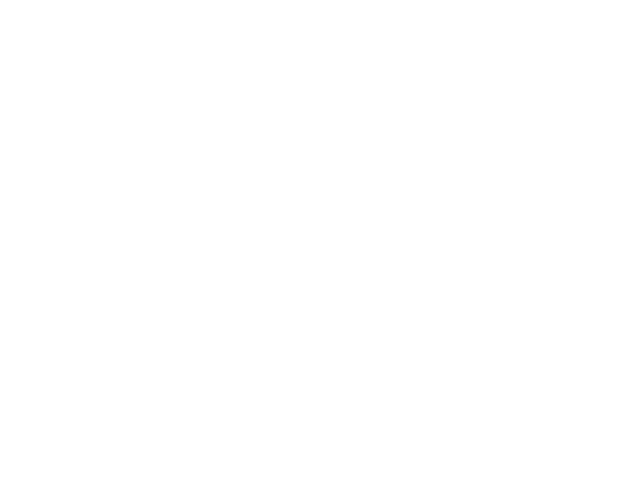

In [17]:
ch = c.show_boat_arrows(df, ss, dt_seconds=10, skip=3)

In [32]:
wdf.row_times

46510   2020-02-08 11:41:21.869960489-08:00
46511   2020-02-08 11:41:21.974937400-08:00
46512   2020-02-08 11:41:22.079914310-08:00
46513   2020-02-08 11:41:22.184891221-08:00
46514   2020-02-08 11:41:22.289868132-08:00
                        ...                
52006   2020-02-08 11:50:58.823061818-08:00
52007   2020-02-08 11:50:58.928038729-08:00
52008   2020-02-08 11:50:59.033015640-08:00
52009   2020-02-08 11:50:59.137992550-08:00
52010   2020-02-08 11:50:59.242969461-08:00
Name: row_times, Length: 5501, dtype: datetime64[ns, US/Pacific]

In [ ]:
import tides

plt.figure()
ttt = tides.tides_at(odf.row_times)
plt.plot(odf.row_times, ttt)

In [ ]:
df.variation

In [ ]:
wdf.twd

In [ ]:
c.quick_plot(df.row_times, (df.twd, 20*df.tws))



In [ ]:
wdf.row_times